In [97]:
# imports
import pandas as pd


In [98]:
# reading the dataset
df = pd.read_csv('Data/AB_US_2020.csv')
# first five rows of the dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [99]:
# shape of the dataset(rows,columns)
df.shape

(226030, 17)

In [100]:
# To find the data types of all the columns
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
city                               object
dtype: object

In [101]:
# To find null or missing values
df.isnull().sum()

id                                     0
name                                  28
host_id                                0
host_name                             33
neighbourhood_group               115845
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        48602
reviews_per_month                  48602
calculated_host_listings_count         0
availability_365                       0
city                                   0
dtype: int64

In [102]:
# occurrences of different room_type in a column
df['room_type'].value_counts()

Entire home/apt    154173
Private room        65887
Shared room          4029
Hotel room           1941
Name: room_type, dtype: int64

In [103]:
# occurrences of different cities in a column
df['city'].value_counts()

New York City        45756
Los Angeles          31536
Hawaii               22434
San Diego            12404
Broward County       10858
                     ...  
Santa Cruz County     1571
Columbus              1409
Cambridge             1029
Salem                  202
Pacific Grove          179
Name: city, Length: 28, dtype: int64

In [104]:
# occurrences of different neighbourhood
df['neighbourhood'].value_counts()

Unincorporated Areas    8020
Hollywood               4384
Primary Urban Center    4179
Hennepin                3935
Kihei-Makena            3894
                        ... 
Gerritsen Beach            1
Rossville                  1
Columbia Gardens           1
Whittier Narrows           1
Oakland Airport            1
Name: neighbourhood, Length: 1450, dtype: int64

In [105]:
# first 5 values of neighbourhood column
df['neighbourhood'].head()

0    28804
1    28801
2    28801
3    28806
4    28801
Name: neighbourhood, dtype: object

In [106]:
# last 5 values of neighbourhood column
df['neighbourhood'].tail()

226025    Downtown, Chinatown, Penn Quarters, Mount Vern...
226026                        Brookland, Brentwood, Langdon
226027                                   Shaw, Logan Circle
226028       Kalorama Heights, Adams Morgan, Lanier Heights
226029    Edgewood, Bloomingdale, Truxton Circle, Eckington
Name: neighbourhood, dtype: object

In [107]:
# occurrences of different neighbourhood_group
df['neighbourhood_group'].value_counts()

Manhattan              20236
Brooklyn               18263
City of Los Angeles    17544
Other Cities           11463
Maui                    7897
                       ...  
Lake City                118
Kent                     108
Bristol                  107
Seward Park               69
Interbay                  34
Name: neighbourhood_group, Length: 34, dtype: int64

In [108]:
pd.options.display.max_rows = 20
df["minimum_nights"].value_counts()

1      60427
2      54748
30     33532
3      30931
4       9513
       ...  
49         1
345        1
229        1
102        1
456        1
Name: minimum_nights, Length: 169, dtype: int64

In [109]:
# dropped the irrelevant columns and created new dataframe
new_df = df.drop(['host_name','host_id','neighbourhood_group','neighbourhood','last_review'], axis=1)

In [110]:
# first 5 rows of new dataset
new_df.head()

,id,name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,35.65146,-82.62792,Private room,60,1,138,1.14,1,0,Asheville
1,80905,French Chic Loft,35.59779,-82.55540,Entire home/apt,470,1,114,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,35.60670,-82.55563,Entire home/apt,75,30,89,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,35.57864,-82.59578,Entire home/apt,90,1,267,2.39,5,0,Asheville
4,160594,Historic Grove Park,35.61442,-82.54127,Private room,125,30,58,0.52,1,0,Asheville


In [111]:
# replacing NaN values for the reviews_per_month column
new_df['reviews_per_month'] = new_df['reviews_per_month'].fillna(0)


In [112]:
# checking again the column if there is any null value but now there is no null vales
new_df['reviews_per_month'].isnull().sum()

0

In [113]:
# check all the null or missing or NaN values
new_df.isnull().sum()

id                                 0
name                              28
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
city                               0
dtype: int64

In [114]:
# To find null values in the name column
new_df[new_df['name'].isnull()].head()


,id,name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
23691,39717529,NaN,26.28332,-80.10731,Entire home/apt,79,2,16,2.23,2,136,Broward County
81872,17108083,NaN,34.17216,-118.11699,Private room,125,2,0,0.00,1,179,Los Angeles
93004,33877948,NaN,34.41328,-118.44301,Private room,40,1,10,0.64,1,129,Los Angeles
119475,1615764,NaN,40.71239,-74.01620,Entire home/apt,400,1000,0,0.00,1,362,New York City
120149,2232600,NaN,40.73215,-73.98821,Entire home/apt,200,1,28,0.37,1,364,New York City


In [115]:
# replacing NaN values with no_name
new_df['name'].fillna('no_name', inplace = True) 

In [116]:
# check for null values again
new_df.isnull().sum()

id                                0
name                              0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
city                              0
dtype: int64

In [117]:
# check the dataset again
new_df.head()

,id,name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,35.65146,-82.62792,Private room,60,1,138,1.14,1,0,Asheville
1,80905,French Chic Loft,35.59779,-82.55540,Entire home/apt,470,1,114,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,35.60670,-82.55563,Entire home/apt,75,30,89,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,35.57864,-82.59578,Entire home/apt,90,1,267,2.39,5,0,Asheville
4,160594,Historic Grove Park,35.61442,-82.54127,Private room,125,30,58,0.52,1,0,Asheville


In [118]:
new_df = new_df.drop(['id','name'],axis=1)
new_df.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
0,35.65146,-82.62792,Private room,60,1,138,1.14,1,0,Asheville
1,35.59779,-82.55540,Entire home/apt,470,1,114,1.03,11,288,Asheville
2,35.60670,-82.55563,Entire home/apt,75,30,89,0.81,2,298,Asheville
3,35.57864,-82.59578,Entire home/apt,90,1,267,2.39,5,0,Asheville
4,35.61442,-82.54127,Private room,125,30,58,0.52,1,0,Asheville


In [119]:
# split the data into a training set and a validation set
from sklearn.model_selection import train_test_split
train, val = train_test_split(new_df, train_size=0.80, test_size=0.20,random_state=42)

# set an X and y for train and val
target = 'price'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]


In [120]:
import category_encoders as ce
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# train a random forest regressor
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestRegressor(n_estimators=50, criterion="mse", max_depth=3, random_state=42,n_jobs=-1)
)
# fit the data on train and score the data on val
pipeline.fit(X_train,y_train)


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['room_type', 'city'],
                                mapping=[{'col': 'room_type',
                                          'data_type': dtype('O'),
                                          'mapping': Entire home/apt    1
Private room       2
Shared room        3
Hotel room         4
NaN               -2
dtype: int64},
                                         {'col': 'city',
                                          'data_type': dtype('O'),
                                          'mapping': Hawaii            1
New Orleans       2
Boston            3
Austin            4
Los Angeles       5
                 ..
Jersey City      25
Pacific Grove    26
Columbus         27
Salem            28
NaN              -2
Length: 29, dtype: int64}])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=3, n_estimators=50, n_jobs=-1,
                                       random_state=42

In [121]:
pred = pipeline.predict(X_val)
print("R2 Score:", r2_score(y_val,pred))
print("Mean Squared Error:", mean_squared_error(y_val,pred))
print("Mean Absolute Error:", mean_absolute_error(y_val,pred))

R2 Score: 0.04684412840538321
Mean Squared Error: 347015.2497850995
Mean Absolute Error: 162.48903188123526


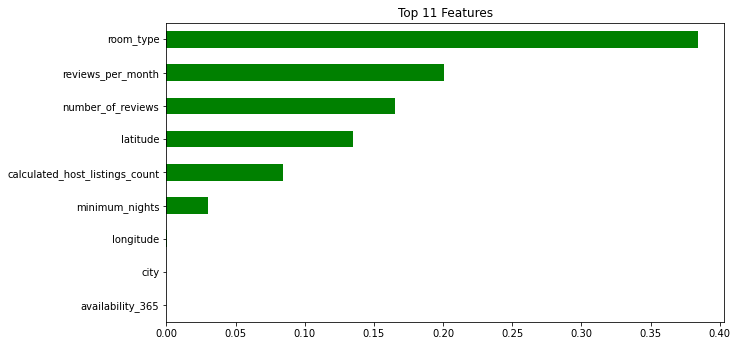

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt

rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

n = 11
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} Features')
importances.sort_values()[-n:].plot.barh(color='green');

In [123]:
from xgboost import XGBRegressor

pipleline_XGB = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

pipleline_XGB.fit(X_train,y_train)


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['room_type', 'city'],
                                mapping=[{'col': 'room_type',
                                          'data_type': dtype('O'),
                                          'mapping': Entire home/apt    1
Private room       2
Shared room        3
Hotel room         4
NaN               -2
dtype: int64},
                                         {'col': 'city',
                                          'data_type': dtype('O'),
                                          'mapping': Hawaii            1
New Orleans       2
Boston            3
Austin            4
Los Angeles       5
                 ..
Jersey City      25
Pacific Grove    26
Columbus         27
Salem            28
NaN              -2
Length: 2...
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
           

In [124]:
pred = pipleline_XGB.predict(X_val)
print("R2 Score:", r2_score(y_val,pred))
print("Mean Squared Error:", mean_squared_error(y_val,pred))
print("Mean Absolute Error:", mean_absolute_error(y_val,pred))

R2 Score: 0.4076940346050424
Mean Squared Error: 215640.7033268037
Mean Absolute Error: 127.58129119192431
